In [160]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import joblib  # model 저장용

# mnist data setting

In [161]:
mnist = tf.keras.datasets.mnist 
(train_set, train_label), (test_set, test_label) = mnist.load_data()

In [162]:
train_set.shape, test_set.shape

((60000, 28, 28), (10000, 28, 28))

### 이미지 출력용 데이터셋 따로 저장

In [163]:
train_set_2dim = train_set
test_set_2dim = test_set

# 학습

In [164]:
clf = RandomForestClassifier()

### shape 맞춰주기
- 1차원으로 펴주고 쉐입 맞춰주기. 아니면 에러 발생
    - NN은 1차원으로 넣어줘야하는데 얘는 왜?
- 아래는 동일한 코드
```python
train_set = train_set.reshape(len(train_set), 784)  # 784 = 28*28
train_set = train_set.reshape(len(train_set), -1)  # 한 차원 줄이기
```

In [165]:
train_set = train_set.reshape(len(train_set), -1)
test_set = test_set.reshape(len(test_set), -1)

In [166]:
clf.fit(train_set, train_label)

RandomForestClassifier()

### predict할 때 주의하기
- train_set[0] 하면 1차원으로 인식해서 shape 에러 뜸
- train_set[0:1] 하면 2차원으로 인식

In [167]:
print(clf.predict(train_set[59999:60000]))

[8]


In [168]:
pred = clf.predict(test_set)

In [176]:
pred.shape, test_label.shape

((10000,), (10000,))

# 필요한 함수 생성

In [169]:
def show_IMG(img):
    '''
    노란색, 보라색 출력되는 이미지를 백그라운드는 흰색, 글자는 흑백으로 출력
    '''
    plt.imshow(255-img, cmap="gray")  # 이미지 반전 후 흑백으로 설정
    plt.show()

In [170]:
def hw(pred, y_test):
    '''
    예측값과 실제값을 비교해 잘못 예측한 값을 딕셔너리 형태로 반환
    key : 틀린 예측을 한 데이터의 인덱스
    values : [예측값, 실제값]
    '''

    # miss dict 생성
    miss = {}

    for i in range(len(y_test)):
        if pred[i] != y_test[i]:  # 예측이 틀렸다면
            miss[i] = [pred[i], y_test[i]]
    
    print(f"※ 예측에 실패한 데이터는 총 {len(miss)}개 입니다. ※")
    
    return miss

In [171]:
miss = hw(pred, test_label)

※ 예측에 실패한 데이터는 총 295개 입니다. ※


In [183]:
def show_miss(miss, x_test_2dim, idx):  # , key=None
    '''
    miss : 잘못 예측한 값이 들어있는 딕셔너리
    x_test_2dim : 2차원 형태의 이미지 데이터셋
    idx : 출력하고자 하는 임의의 숫자
    '''
    print(f"▶ {list(miss)[idx]}번째 데이터 예측 실패\n : 예측한 값은 {list(miss.values())[idx][0]}이지만 실제 값은 {list(miss.values())[idx][1]}입니다.")
    show_IMG(x_test_2dim[list(miss)[idx]])

▶ 341번째 데이터 예측 실패
 : 예측한 값은 4이지만 실제 값은 6입니다.


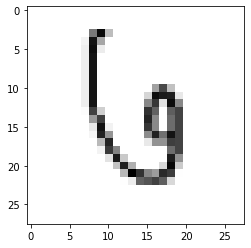

In [184]:
show_miss(miss, test_set_2dim, 8)

▶ 403번째 데이터 예측 실패
 : 예측한 값은 9이지만 실제 값은 8입니다.


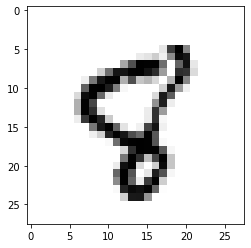

▶ 445번째 데이터 예측 실패
 : 예측한 값은 0이지만 실제 값은 6입니다.


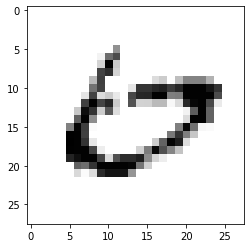

▶ 448번째 데이터 예측 실패
 : 예측한 값은 8이지만 실제 값은 9입니다.


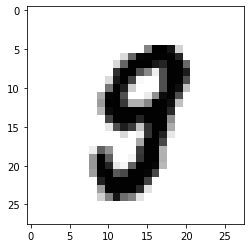

▶ 449번째 데이터 예측 실패
 : 예측한 값은 5이지만 실제 값은 3입니다.


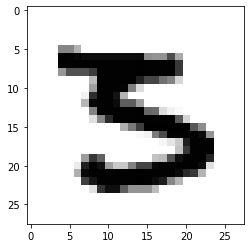

▶ 495번째 데이터 예측 실패
 : 예측한 값은 2이지만 실제 값은 8입니다.


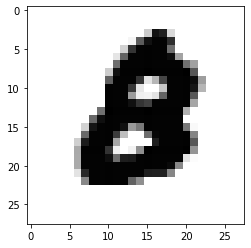

▶ 507번째 데이터 예측 실패
 : 예측한 값은 5이지만 실제 값은 3입니다.


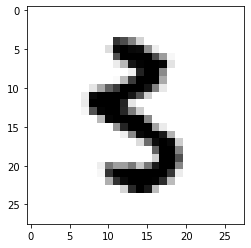

▶ 553번째 데이터 예측 실패
 : 예측한 값은 6이지만 실제 값은 8입니다.


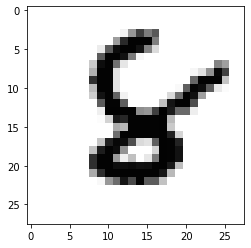

▶ 578번째 데이터 예측 실패
 : 예측한 값은 7이지만 실제 값은 3입니다.


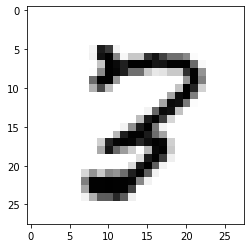

▶ 582번째 데이터 예측 실패
 : 예측한 값은 2이지만 실제 값은 8입니다.


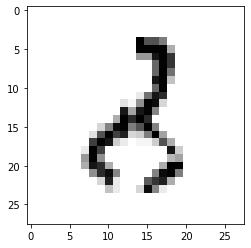

▶ 646번째 데이터 예측 실패
 : 예측한 값은 6이지만 실제 값은 2입니다.


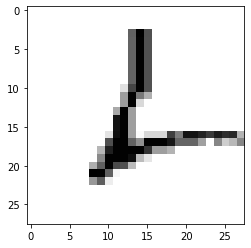

In [186]:
for i in range(10, 20):
    show_miss(miss, test_set_2dim, i)